In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import random 

In [435]:
SPX = pd.read_csv('E:\Downloads\HistoricalData_SPX.csv')
SPX.head()

,Date,Close/Last,Volume,Open,High,Low
0,12/09/2022,3934.38,--,3954.17,3977.02,3933.04
1,12/08/2022,3963.51,--,3947.79,3974.19,3935.83
2,12/07/2022,3933.92,--,3933.28,3957.57,3922.68
3,12/06/2022,3941.26,--,3996.63,4001.51,3918.39
4,12/05/2022,3998.84,--,4052.02,4052.45,3984.49


In [436]:
TSX = pd.read_csv('E:\Downloads\HistoricalData_TSX.csv')
TSX.head()

,Date,Close/Last,Volume,Open,High,Low
0,12/09/2022,19947.07,215723813,19990.09,20086.26,19944.80
1,12/08/2022,19969.19,240246358,20044.87,20086.40,19947.18
2,12/07/2022,19973.22,241429361,19971.25,20093.02,19957.62
3,12/06/2022,19990.17,273032314,20262.04,20306.56,19960.02
4,12/05/2022,20242.26,293487277,20453.68,20476.35,20203.95


In [437]:
STOX = pd.read_csv('E:\Downloads\^STOXX.csv')
STOX.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-12,389.350006,391.630005,388.450012,391.630005,391.630005,245924100
1,2017-12-13,391.559998,391.559998,390.700012,390.700012,390.700012,260873400
2,2017-12-14,390.279999,390.359985,388.899994,388.910004,388.910004,242942600
3,2017-12-15,388.540009,388.670013,387.070007,388.190002,388.190002,342148700
4,2017-12-18,389.010010,393.010010,389.010010,392.660004,392.660004,186947000


In [438]:
SSE = pd.read_csv('E:\Downloads\SSE.csv')
SSE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-12,3320.310059,3320.310059,3280.329102,3280.813965,3280.813965,124600
1,2017-12-13,3278.396973,3304.010010,3273.324951,3303.037109,3303.037109,112000
2,2017-12-14,3302.931885,3309.530029,3282.572998,3292.438965,3292.438965,120500
3,2017-12-15,3287.529053,3287.529053,3259.387939,3266.136963,3266.136963,130900
4,2017-12-18,3268.033936,3280.543945,3254.177979,3267.922119,3267.922119,120700


In [439]:
D = SPX['Close/Last']
D

0       3934.38
1       3963.51
2       3933.92
3       3941.26
4       3998.84
         ...   
1253    2690.16
1254    2675.81
1255    2652.01
1256    2662.85
1257    2664.11
Name: Close/Last, Length: 1258, dtype: float64

In [440]:
dates = SPX['Date'][::-1][45:]
dates = [datetime.strptime(d, '%m/%d/%Y') for d in dates]
D = SPX['Close/Last']

In [490]:
import statistics
from scipy.stats import norm
#Mean 
def cal_mean_std(arr):
    Return = []

    for i in range(1,len(arr)):
        Return.append((arr[i]-arr[i-1])/arr[i-1])
#     Return.pop(0)
    mu = statistics.mean(Return)

    sigma = np.std(Return)

    return mu, sigma 

In [442]:
def compute_returns(arr):
    ret = []
    for i in range(1,len(arr)):
        r = arr[i] - arr[i-1]
        r = r/arr[i-1]
        ret.append(r)
    return ret

In [443]:
SSE["Date"]

0       2017-12-12
1       2017-12-13
2       2017-12-14
3       2017-12-15
4       2017-12-18
           ...    
1208    2022-12-06
1209    2022-12-07
1210    2022-12-08
1211    2022-12-09
1212    2022-12-12
Name: Date, Length: 1213, dtype: object

Text(0, 0.5, 'daily returns')

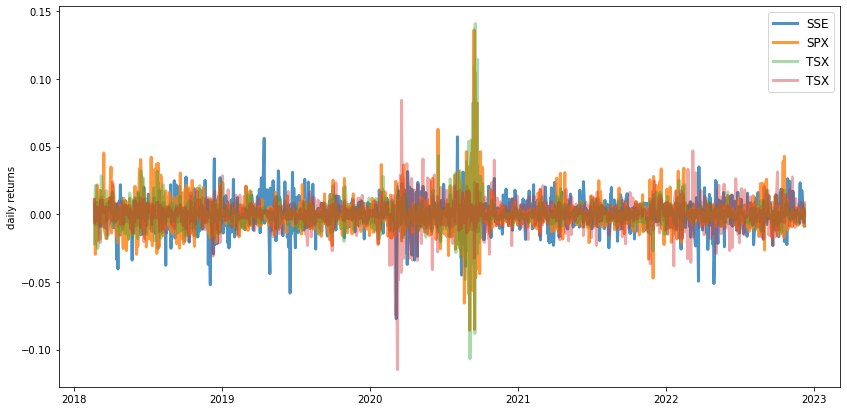

In [444]:
dates = SPX['Date'][::-1][46:]
dates = [datetime.strptime(d, '%m/%d/%Y') for d in dates]
plt.figure(figsize=(14, 7))
plt.plot(dates, compute_returns(SSE['Close']), lw=3, alpha=0.8,label="SSE")
plt.plot(dates, compute_returns(SPX['Close/Last'])[45:], lw=3, alpha=0.8,label="SPX")
plt.plot(dates, compute_returns(TSX['Close/Last'])[41:], lw=3, alpha=0.4,label="TSX")
plt.plot(dates, compute_returns(STOX['Close'])[43:], lw=3, alpha=0.4,label="TSX")
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [445]:
securities = np.array([compute_returns(SSE['Close']), compute_returns(SPX['Close/Last'])[45:], compute_returns(TSX['Close/Last'])[41:], compute_returns(STOX['Close'])[43:]])
securities

array([[ 0.00677367, -0.00320861, -0.00798861, ..., -0.00070947,
         0.00300244, -0.00870241],
       [ 0.01035113,  0.00202205, -0.0296761 , ..., -0.0088945 ,
         0.00408747,  0.00047318],
       [-0.0218845 ,  0.00057123,  0.02011618, ..., -0.00159083,
         0.00750041, -0.00139806],
       [ 0.010916  , -0.00625297,  0.00600153, ..., -0.00619703,
        -0.00167357,  0.00840472]])

# Portfolio optimisation

To determine the optimal combination of the these assets we extract the mean and standard deviation for each price series as well as the correlations between them

In [446]:
means = []
std   = []

means.append(cal_mean_std(SSE['Close'])[0])
means.append(cal_mean_std(SPX['Close/Last'])[0])
means.append(cal_mean_std(TSX['Close/Last'])[0])
means.append(cal_mean_std(STOX['Close'])[0])

std.append(cal_mean_std(SSE['Close'])[1])
std.append(cal_mean_std(SPX['Close/Last'])[1])
std.append(cal_mean_std(TSX['Close/Last'])[1])
std.append(cal_mean_std(STOX['Close'])[1])

In [447]:
N = 25000
risk_free_rate = 0.0178

In [448]:
results = np.zeros((3,N))
weights = []
for i in range(N):
    W = np.random.random(4)
    W /= np.sum(W)
    weights.append(W)
    ptf_mean = np.dot(W, np.array(means)) * 252
    ptf_std  = np.sqrt(np.dot(W.T, np.dot(np.cov(securities, bias=True), W))) * np.sqrt(252)
    results[0,i] = ptf_std
    results[1,i] = ptf_mean
    results[2,i] = (ptf_mean - risk_free_rate)/ptf_std

Text(0, 0.5, 'annualised returns')

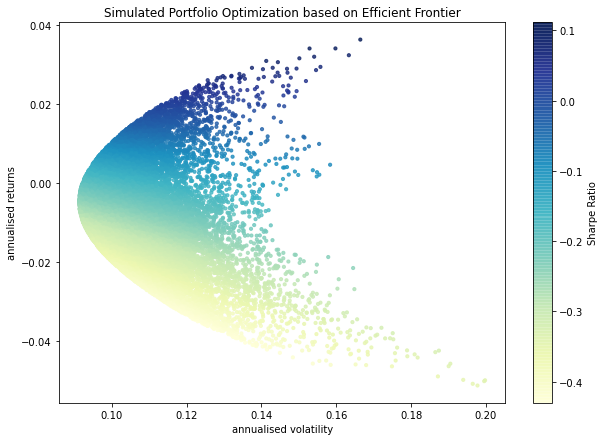

In [449]:
fig =plt.figure(figsize=(10, 7))
plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.8)
plt.colorbar(label="Sharpe Ratio")
plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
plt.xlabel('annualised volatility')
plt.ylabel('annualised returns')


# Determining the porfolio with the lowest risk and the porfolio with the highest sharpe

In [450]:
max_sharpe_idx = np.argmax(results[2])
sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]

In [451]:
min_vol_idx = np.argmin(results[0])
sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]

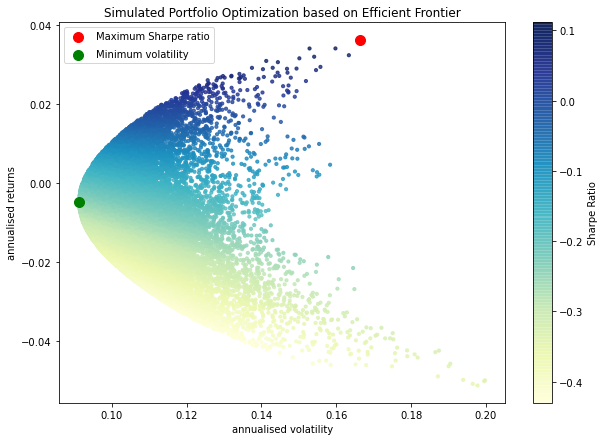

In [452]:
fig =plt.figure(figsize=(10, 7))
plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.8)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(sdp,rp,marker='o',color='r',s=100, label='Maximum Sharpe ratio')
plt.scatter(sdp_min,rp_min,marker='o',color='g',s=100, label='Minimum volatility')
plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
plt.xlabel('annualised volatility')
plt.ylabel('annualised returns')
plt.legend(labelspacing=0.8)

In [453]:
max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=["SSE", "SPX", "TSX", "STOX"],columns=['allocation'])
max_sharpe_allocation.allocation = [round(i,2)for i in max_sharpe_allocation.allocation]
max_sharpe_allocation = max_sharpe_allocation.T
min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=["SSE", "SPX", "TSX", "STOX"],columns=['allocation'])
min_vol_allocation.allocation = [round(i,2)for i in min_vol_allocation.allocation]
min_vol_allocation = min_vol_allocation.T

In [454]:
print("-"*80)
print("Maximum Sharpe Ratio Portfolio Allocation\n")
print("Annualised Return:", round(rp,2))
print("Annualised Volatility:", round(sdp,2))
print("\n")
print(max_sharpe_allocation)
print("-"*80)
print("Minimum Volatility Portfolio Allocation\n")
print("Annualised Return:", round(rp_min,2))
print("Annualised Volatility:", round(sdp_min,2))
print("\n")
print(min_vol_allocation)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.04
Annualised Volatility: 0.17


             SSE   SPX  TSX  STOX
allocation  0.06  0.01  0.0  0.92
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: -0.0
Annualised Volatility: 0.09


             SSE   SPX   TSX  STOX
allocation  0.26  0.19  0.28  0.27


In [455]:
weights[max_sharpe_idx]

array([0.06, 0.01, 0.  , 0.92])

In [456]:
securities

array([[ 0.00677367, -0.00320861, -0.00798861, ..., -0.00070947,
         0.00300244, -0.00870241],
       [ 0.01035113,  0.00202205, -0.0296761 , ..., -0.0088945 ,
         0.00408747,  0.00047318],
       [-0.0218845 ,  0.00057123,  0.02011618, ..., -0.00159083,
         0.00750041, -0.00139806],
       [ 0.010916  , -0.00625297,  0.00600153, ..., -0.00619703,
        -0.00167357,  0.00840472]])

In [457]:
np.dot(weights[max_sharpe_idx], securities)

array([ 0.01055266, -0.00592503,  0.00474533, ..., -0.00583278,
       -0.00131866,  0.00721493])

# Sharpe Maximizer portfolio and Risk minimizer portfolio

In [458]:
SPX_Close     = SPX['Close/Last'][::-1]   /float(SPX['Close/Last'][::-1][:1])   -1
SPX_Close     = SPX_Close[46:]

TSX_Close     = TSX['Close/Last'][::-1]      /float(TSX['Close/Last'][::-1][:1])     -1
TSX_Close     = TSX_Close[42:]

STOX_Close    = STOX['Close'][::-1]       /float(STOX['Close'][::-1][:1])     -1
STOX_Close    = STOX_Close[44:]

SSE_Close     = SSE['Close'][::-1]       /float(SSE['Close'][::-1][:1])     -1
SSE_Close     = SSE_Close[1:]

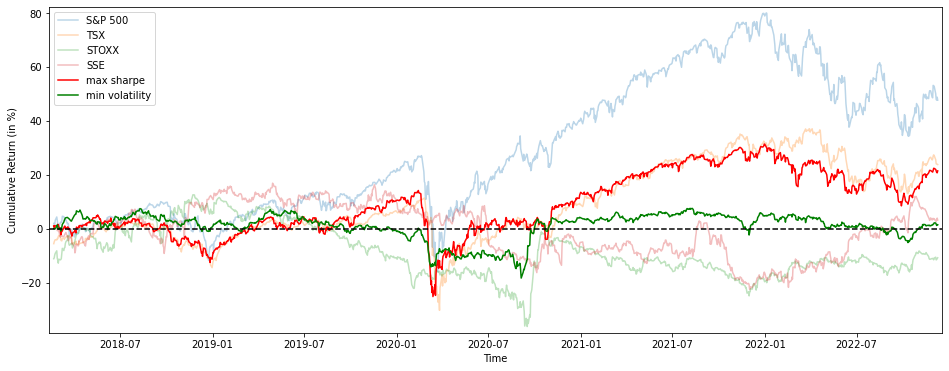

In [459]:
ptf_max_sharpe = np.dot(weights[max_sharpe_idx], securities)
ptf_min_vol    = np.dot(weights[min_vol_idx], securities)
plt.figure(figsize=(16,6))

plt.plot(dates, SPX_Close * 100, alpha=0.3, label="S&P 500")
plt.plot(dates, TSX_Close * 100, alpha=0.3, label="TSX")
plt.plot(dates, STOX_Close * 100, alpha=0.3, label="STOXX")
plt.plot(dates, SSE_Close * 100, alpha=0.3, label="SSE")
plt.plot(dates, np.cumsum(ptf_max_sharpe) * 100, color='r', label="max sharpe")
plt.plot(dates, np.cumsum(ptf_min_vol) * 100, color='g', label="min volatility")
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

# Calculating the optimal portfolios allowing short positions

Text(0, 0.5, 'annualised returns')

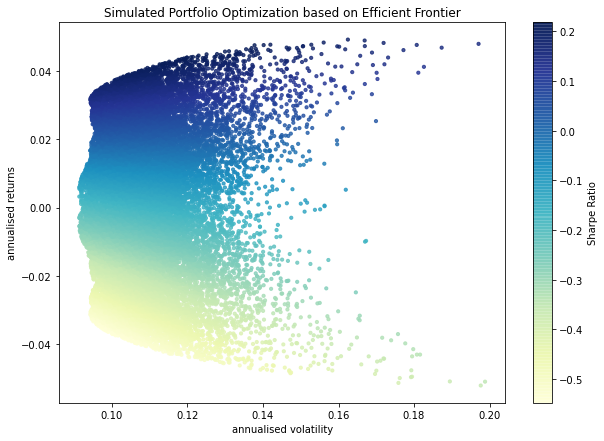

In [460]:
results = np.zeros((3,N))
weights = []
for i in range(N):
    W = np.random.random(4)*2 - 1
    W /= np.sum(abs(W))
    weights.append(W)
    ptf_mean = np.dot(W, np.array(means)) * 252
    ptf_std  = np.sqrt(np.dot(W.T, np.dot(np.cov(securities, bias=True), W))) * np.sqrt(252)
    results[0,i] = ptf_std
    results[1,i] = ptf_mean
    results[2,i] = (ptf_mean - risk_free_rate)/ptf_std
fig =plt.figure(figsize=(10, 7))
plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.8)
plt.colorbar(label="Sharpe Ratio")
plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
plt.xlabel('annualised volatility')
plt.ylabel('annualised returns')

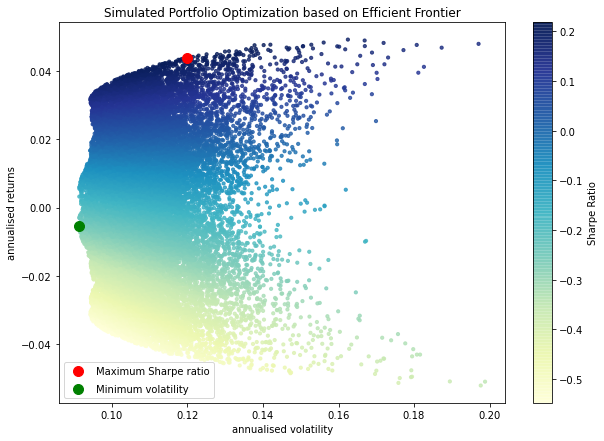

In [461]:
max_sharpe_idx = np.argmax(results[2])
sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
min_vol_idx = np.argmin(results[0])
sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
fig =plt.figure(figsize=(10, 7))
plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.8)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(sdp,rp,marker='o',color='r',s=100, label='Maximum Sharpe ratio')
plt.scatter(sdp_min,rp_min,marker='o',color='g',s=100, label='Minimum volatility')
plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
plt.xlabel('annualised volatility')
plt.ylabel('annualised returns')
plt.legend(labelspacing=0.8)

In [462]:
max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=["SSE", "SPX", "TSX", "STOX"],columns=['allocation'])
max_sharpe_allocation.allocation = [round(i,2)for i in max_sharpe_allocation.allocation]
max_sharpe_allocation = max_sharpe_allocation.T
min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=["SSE", "SPX", "TSX", "STOX"],columns=['allocation'])
min_vol_allocation.allocation = [round(i,2)for i in min_vol_allocation.allocation]
min_vol_allocation = min_vol_allocation.T
print("-"*80)
print("Maximum Sharpe Ratio Portfolio Allocation\n")
print("Annualised Return:", round(rp,2))
print("Annualised Volatility:", round(sdp,2))
print("\n")
print(max_sharpe_allocation)
print("-"*80)
print("Minimum Volatility Portfolio Allocation\n")
print("Annualised Return:", round(rp_min,2))
print("Annualised Volatility:", round(sdp_min,2))
print("\n")
print(min_vol_allocation)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.04
Annualised Volatility: 0.12


             SSE   SPX   TSX  STOX
allocation  0.02 -0.45 -0.18  0.36
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: -0.01
Annualised Volatility: 0.09


             SSE   SPX   TSX  STOX
allocation  0.25  0.19  0.29  0.27


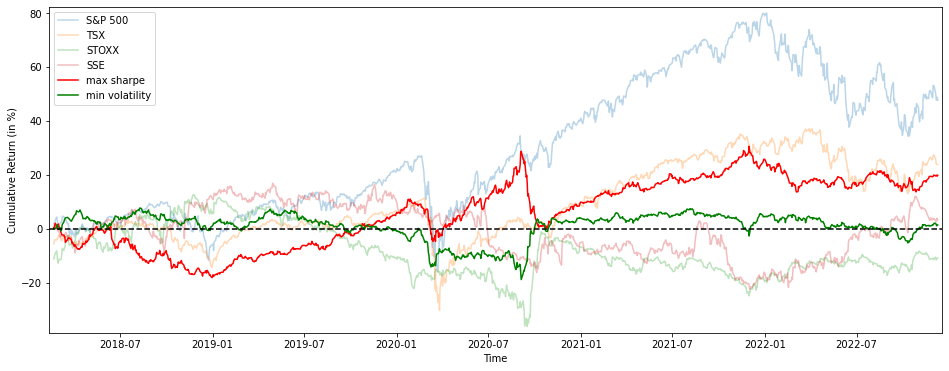

In [463]:
ptf_max_sharpe_short = np.dot(weights[max_sharpe_idx], securities)
ptf_min_vol_short    = np.dot(weights[min_vol_idx], securities)
plt.figure(figsize=(16,6))

plt.plot(dates, SPX_Close * 100, alpha=0.3, label="S&P 500")
plt.plot(dates, TSX_Close * 100, alpha=0.3, label="TSX")
plt.plot(dates, STOX_Close * 100, alpha=0.3, label="STOXX")
plt.plot(dates, SSE_Close * 100, alpha=0.3, label="SSE")
plt.plot(dates, np.cumsum(ptf_max_sharpe_short) * 100, color='r', label="max sharpe")
plt.plot(dates, np.cumsum(ptf_min_vol_short) * 100, color='g', label="min volatility")
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

Comparing the portfolios with and without shorts 

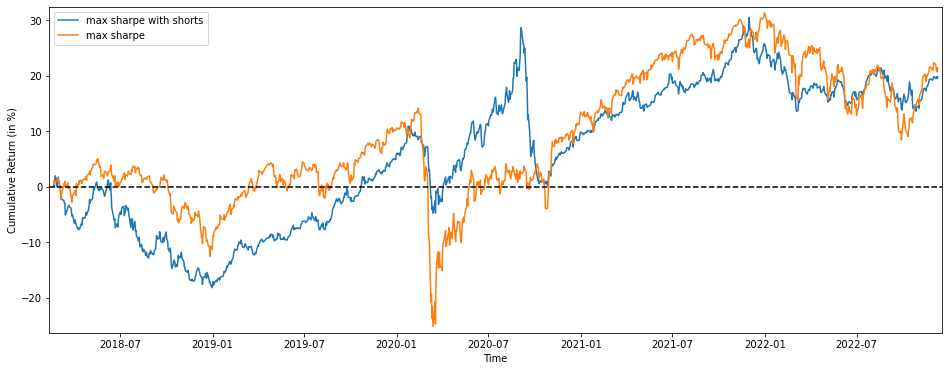

In [464]:
plt.figure(figsize=(16,6))
plt.plot(dates, np.cumsum(ptf_max_sharpe_short) * 100, label="max sharpe with shorts")
plt.plot(dates, np.cumsum(ptf_max_sharpe) * 100, label="max sharpe")
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

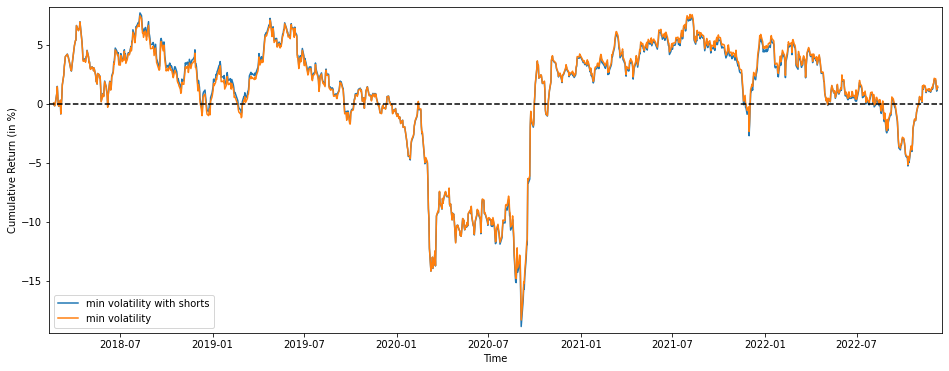

In [465]:
plt.figure(figsize=(16,6))
plt.plot(dates, np.cumsum(ptf_min_vol_short) * 100, label="min volatility with shorts")
plt.plot(dates, np.cumsum(ptf_min_vol) * 100, label="min volatility")
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

# Implementing the genetic algorithm 

In [466]:
nb_assets      = 4

In [467]:
def fitness(W):
    m   = np.dot(W, means) * 252
    std = np.sqrt(np.dot(W.T, np.dot(np.cov(securities, bias=True), W))) * np.sqrt(252)
    return (m - risk_free_rate)/std

In [468]:
def Crossover(parent1,parent2):
    alpha = np.random.rand()
    child1 = alpha * parent1 + (1-alpha) * parent2
    child2 = (1-alpha) * parent1 + alpha * parent2
    return child1,child2

during the mutation step we choose a random parameter and shift it by a random value that is sampled from a normal distribution with mean 0 and standard deviation 5

In [469]:
import random 
x = [1,2,3,4,5,6,7]
random.shuffle(x)
x += [1,2]
x 

[7, 2, 6, 1, 3, 4, 5, 1, 2]

In [470]:
def mutation(child):
    n=np.random.choice(range(nb_assets),1)[0]
    child[n] += np.random.normal(0,5)
    return child

In [471]:
def next_generation(population, elite_frac = 0.5, mutat_frac=0.08):
    new_population = sorted(population,key = lambda x: fitness(x),reverse=True)
    elite_idx      = int(np.floor(len(population)* elite_frac))
    new_population = new_population[:elite_idx]
    random.shuffle(new_population)
    children       = []
    nb_parents     = int(len(new_population)/2)

    for i in range(nb_parents):
        parent1, parent2 = new_population[2*i], new_population[2*i + 1]
        child1, child2   = Crossover(parent1, parent2)
        children        += [child1, child2]
        
    for child in children:
        alpha = random.random()
        if alpha<0.08:
            child = mutation(child)
    
    new_population += children
    
    return new_population

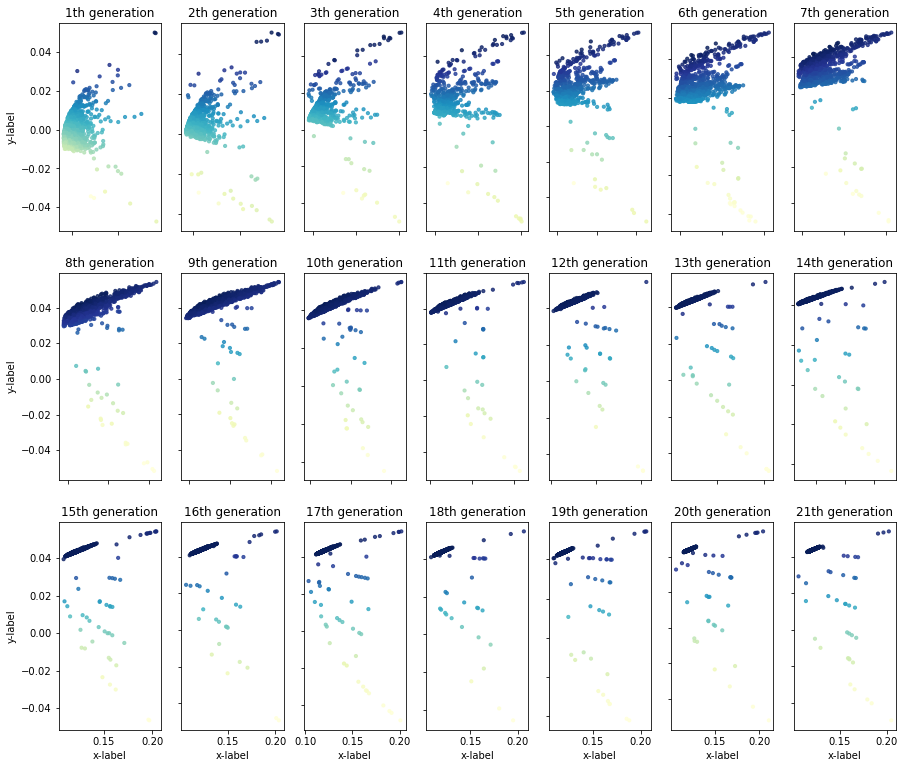

In [472]:
pop_size       = 1000
#--------- number of generation is the number of iterations we perform---------
nb_generations = 21

population = [np.random.random(nb_assets) for _ in range(pop_size)] 
fig, axs = plt.subplots(3, 7, figsize=(15, 13))
for generation in range(nb_generations):
    I = generation // 7
    J = generation - I*7
    population = next_generation(population)
    N = pop_size
    results = np.zeros((3,N))
    weights = []
    for i in range(N):
        W = population[i]
        W /= np.sum(abs(W))
        weights.append(W)
        ptf_mean = np.dot(W, np.array(means)) * 252
        ptf_std  = np.sqrt(np.dot(W.T, np.dot(np.cov(securities, bias=True), W))) * np.sqrt(252)
        results[0,i] = ptf_std
        results[1,i] = ptf_mean
        results[2,i] = (ptf_mean - risk_free_rate)/ptf_std
#     fig =plt.figure(figsize=(10, 7))
    axs[I, J].scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.8)
#     plt.colorbar(label="Sharpe Ratio")
    axs[I, J].set_title(f'{generation + 1}th generation')
#     axs[I, J].xlabel('annualised volatility')
#     axs[I, J].ylabel('annualised returns')
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Dynamic portfolio allocation

In [476]:
securities.shape[1]

1212

In [498]:
def allocation(assets):
    position = []
    means = []
    stds   = []
    for day in range(2, assets.shape[1]):
        
        temp_sse  = SSE['Close'][:day]
        temp_spx  = SPX['Close/Last'][:day]
        temp_tsx  = TSX['Close/Last'][:day]
        temp_stox = STOX['Close'][:day]
        mean_sse, std_sse   = cal_mean_std(temp_sse)
        mean_spx, std_spx   = cal_mean_std(temp_spx)
        mean_tsx, std_tsx   = cal_mean_std(temp_tsx)
        mean_stox, std_stox = cal_mean_std(temp_stox)
        
        means.append(np.array([mean_sse, mean_spx, mean_tsx, mean_stox]))
        
        stds.append(np.array([std_sse, std_spx, std_tsx, std_stox]))

    return means, stds

In [499]:
means, stds = allocation(securities)

In [502]:
positions = []
for day in range(len(means)):
    if day % 100 == 0:
        print(day)
    N = 200
    results = np.zeros((3,N))
    weights = []
    mean = means[i]
    for i in range(N):
        W = np.random.random(4)
        W /= np.sum(W)
        weights.append(W)
        ptf_mean = np.dot(W, np.array(mean)) * 252
        ptf_std  = np.sqrt(np.dot(W.T, np.dot(np.cov(securities, bias=True), W))) * np.sqrt(252)
        results[0,i] = ptf_std
        results[1,i] = ptf_mean
        results[2,i] = (ptf_mean - risk_free_rate)/ptf_std
    max_sharpe_idx = np.argmax(results[2])
    positions.append(weights[max_sharpe_idx])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200


In [535]:
Ptf = np.array(securities)
Ptf = Ptf[:, 2:]
Ptf.shape

(4, 1210)

In [536]:
position = np.array(positions)
position.shape

(1210, 4)

In [538]:
dynamic_ptf = np.dot(position, Ptf)
dynamic_ptf.shape

(1210, 1210)

In [539]:
dynamic_ptf = np.diag(dynamic_ptf)
dynamic_ptf.shape

(1210,)

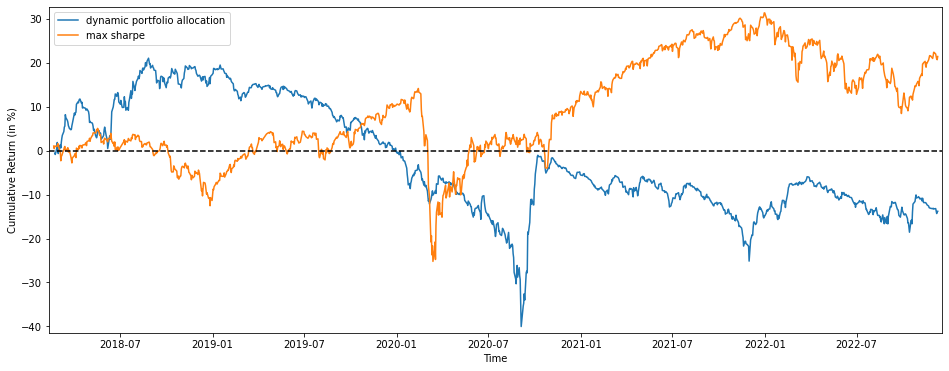

In [543]:
plt.figure(figsize=(16,6))
plt.plot(dates[2:], np.cumsum(dynamic_ptf) * 100, label="dynamic portfolio allocation")
plt.plot(dates, np.cumsum(ptf_max_sharpe) * 100, label="max sharpe")
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()